In [1]:
!wget http://cb.lk/covid_19

--2023-05-24 11:21:33--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-05-24 11:21:33--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-05-24 11:21:35--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc591

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
TRAIN_PATH = 'CovidDataset/Train'
VAL_PATH = 'CovidDataset/Test'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [6]:
# CNN MODEL USING KERAS

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu',))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu',name = 'last_conv'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [10]:
# TRAINING FROM SCRATCH

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [33]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 0.1704 - accuracy: 0.9464 - val_loss: 0.0693 - val_accuracy: 0.9667
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.1302 - accuracy: 0.9777 - val_loss: 0.0808 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.1852 - accuracy: 0.9420 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.0919 - accuracy: 0.9777 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0870 - accuracy: 0.9911 - val_loss: 0.0733 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.1266 - accuracy: 0.9732 - val_loss: 0.0745 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 10s 2s/step - loss: 0.1506 - accuracy: 0.9464 - val_loss: 0.0431 - val_accuracy: 0.9833
Epoch 7: early stopping


1/1 [==============================] - 0s 88ms/step


<ipython-input-50-b27df6b379a2>:24: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)


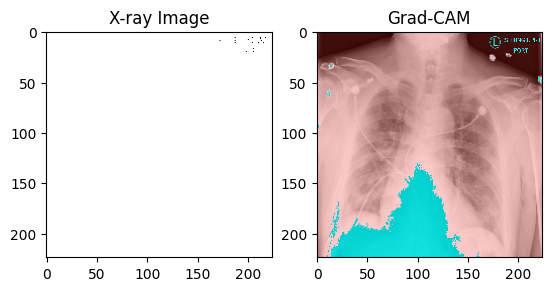

1/1 [==============================] - 0s 20ms/step
Predicted class: Covid
Confidence: 0.9975447014439851


In [50]:
import cv2
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

def grad_cam(model, img_path, layer_name):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    
    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])
    
    cam_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))
    conv_outputs, predictions = cam_model.predict(x)
    conv_outputs = conv_outputs[0]
    
    # Calculate the weighted sum of conv_outputs
    cam = np.zeros(dtype=np.float32, shape=conv_outputs.shape[:2])
    for i, w in enumerate(predictions[0]):
        cam += w * np.mean(conv_outputs[:, :, i])
    
    cam /= np.max(cam)
    cam = cv2.resize(cam, (224, 224))
    
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap[np.where(cam < 0.2)] = 0
    
    img_array = image.img_to_array(img)
    heatmap = np.uint8(heatmap * 0.4 + img_array)
    heatmap = heatmap / np.max(heatmap)
    
    return img_array, heatmap


layer_name = 'last_conv'

img_path = '/content/CovidDataset/Val/Covid/16654_2_1.jpg'
xray_img,gradcam_img = grad_cam(model, img_path, layer_name)

plt.subplot(1, 2, 1)
plt.imshow(xray_img)
plt.title('X-ray Image')

plt.subplot(1, 2, 2)
plt.imshow(gradcam_img)
plt.title('Grad-CAM')

plt.show()

from PIL import Image
from keras.preprocessing import image
import numpy as np

img = Image.open(img_path)
img = img.resize((224, 224))
img = img.convert('RGB')
img = np.array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  

prediction = model.predict(img)

class_names = ['Normal', 'COVID-19']
predicted_class = np.argmax(prediction[0])
confidence = prediction[0][predicted_class]

if confidence > 0.8:
  print('Predicted class: Normal')
  print('Confidence:', confidence)
elif confidence < 0.2:
  print('Predicted class: Covid')
  print('Confidence:', 1 - confidence)
else:
  print('Not certain')
  print(confidence)